In [80]:
%matplotlib inline
import pandas as pd
import cPickle as pickle
import bz2

in_dir='/cellar/users/btsui/Program/biobakery-metaphlan2-5ea2bdea8b78/databases/mpa_v20_m200.pkl'
db = pickle.load(bz2.BZ2File(in_dir, 'r'))



In [2]:
db.keys()

['taxonomy', 'markers']

In [4]:
markers_dict=db['markers']

In [23]:
taxon_dict=db['taxonomy']

In [26]:
len(taxon_dict.keys())
taxon_dict['k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Pseudomonadales|f__Moraxellaceae|g__Acinetobacter|s__Acinetobacter_baumannii|t__GCF_000222265']

4063283

In [7]:
myDf=pd.DataFrame(markers_dict)

In [9]:
myDf_T=myDf.T

In [160]:
!echo $PWD/mpa_v20_m200.df.pickle

/cellar/users/btsui/Project/METAMAP/notebook/RapMapTest/DownloadGenome/mpa_v20_m200.df.pickle


In [161]:
!echo $PWD/mpa_v20_m200.df.pickle

/cellar/users/btsui/Project/METAMAP/notebook/RapMapTest/DownloadGenome/mpa_v20_m200.df.pickle


In [162]:
myDf_T.to_pickle('mpa_v20_m200.df.pickle')

In [40]:
VC=myDf_T.clade.value_counts()

In [ ]:
"""

"""

In [71]:
## take only virus
myDf_T[myDf_T.taxon.str.contains('s__Simian_virus_40')]['ke'].sum()

4816

In [89]:
myDf_T['len'].sum()

711565727

In [156]:
import numpy as np
myDf_T[myDf_T.taxon.str.contains('virus')]['len'].sum()

33165482

In [159]:
26774850/33165482.0

0.8073107455516552

In [93]:
np.log10(711565727.0)

8.8522150218553453

In [92]:
#26774850/711565727.0

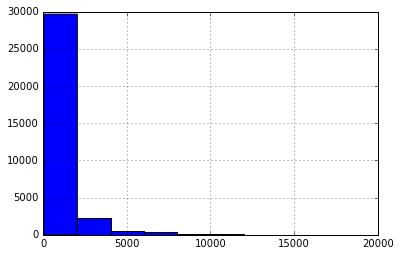

In [81]:
myDf_T[myDf_T.taxon.str.contains('virus')]['len'].hist()

In [38]:
myDf_T.clade.nunique()

8916

In [147]:
import gzip
from Bio import SeqIO
"""
forget about the 16s from japan database
"""
my_16s_dir='/cellar/users/btsui/trainset16_022016.rdp.fasta.gz'
my_16s_dict={}
with gzip.open(my_16s_dir, 'rb') as f:
    for record in SeqIO.parse(f,'fasta'):
        my_16s_dict[record.name]=len(record)
        

In [151]:
#| samtools sort -n - 2.name.sorted.bam
my_16s_S=pd.Series(my_16s_dict)
np.log10(my_16s_S.sum())

7.280991686620176

In [130]:
newI=my_16s_S.index.str.extract('\|([a-zA-Z\ ]+)')
tmp_16S=my_16s_S.copy()
tmp_16S.index=newI

/cellar/users/btsui/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


In [120]:
VC=my_16s_S.index.str.extract('\|([a-zA-Z\ ]+)').value_counts()

/cellar/users/btsui/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


In [146]:
len(my_16s_S)

751232

In [131]:
tmp_16S.groupby(tmp_16S.index).first().sum()

5924612L

In [138]:
5924612.0/my_16s_S.sum()

0.007335970276183615

In [135]:
VC.sum()

748136L

In [139]:
VC.nunique()

482

In [143]:
#482*482

In [122]:
VC/VC.sum()

Bacillus                 0.120275
Pseudomonas              0.061247
Streptomyces             0.041942
bacterium                0.035564
Lactobacillus            0.031931
Streptococcus            0.024061
Vibrio                   0.020833
Staphylococcus           0.017470
Enterococcus             0.015091
Acinetobacter            0.014926
Candidatus               0.014533
Enterobacter             0.012474
Burkholderia             0.012389
Paenibacillus            0.010851
Microbacterium           0.009937
Arthrobacter             0.009581
Escherichia              0.009528
Rhizobium                0.009255
Klebsiella               0.009071
Aeromonas                0.008593
Stenotrophomonas         0.007404
Pseudoalteromonas        0.007396
Bradyrhizobium           0.006969
Mycobacterium            0.006933
Halomonas                0.006885
Salmonella               0.006538
Serratia                 0.006182
Flavobacterium           0.006109
Pantoea                  0.005742
Rhodococcus   

In [113]:
#Nitrosomonas
my_16s_S[my_16s_S.index.str.contains('Betaproteobacteria')]

AM399072_1|Betaproteobacteria     883
AM399075_1|Betaproteobacteria     883
AM399076_1|Betaproteobacteria    1411
CP019169_1|Betaproteobacteria    1544
CP019169_2|Betaproteobacteria    1544
JQ897291_1|Betaproteobacteria     692
JQ897292_1|Betaproteobacteria     549
KF447621_1|Betaproteobacteria     428
KM032829_1|Betaproteobacteria     378
KM349948_1|Betaproteobacteria     550
KP744581_1|Betaproteobacteria     800
KR922296_1|Betaproteobacteria     971
KT907023_1|Betaproteobacteria    1453
KT907024_1|Betaproteobacteria    1453
KT907033_1|Betaproteobacteria    1453
KT907034_1|Betaproteobacteria    1453
KT907035_1|Betaproteobacteria    1453
KT907036_1|Betaproteobacteria    1453
KT907037_1|Betaproteobacteria    1453
KU230000_1|Betaproteobacteria    1279
KU382371_1|Betaproteobacteria    1328
KU382372_1|Betaproteobacteria    1315
KX622730_1|Betaproteobacteria    1417
KY053192_1|Betaproteobacteria    1369
KY053193_1|Betaproteobacteria    1379
KY053195_1|Betaproteobacteria    1355
KY053198_1|B

In [109]:
len(my_16s_S.index.value_counts())

751232

In [104]:
np.log10(my_16s_S.sum())

8.9072023508807998